# SIFT and pattern matching

In [1]:
import os
import cv2
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%config InlineBackend.figure_format = "svg"
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["image.cmap"] = "gray"

In [2]:
path_marked = "dataset/istock/watermarked"

def load_imgs(dir_path, convert_to_rgb=True):
    imgs = []
    for img_path in sorted(os.listdir(dir_path)):
        img = cv2.imread(dir_path + "/" + img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if convert_to_rgb else img
        img = cv2.resize(img, (img.shape[1] * 400 // img.shape[0], 400))
        imgs.append(img)
    return imgs

marked = load_imgs(path_marked)
mask = cv2.cvtColor(cv2.imread("dataset/istock/mask_cut.png"), cv2.COLOR_BGR2RGB)
img = marked[0]

In [3]:
from sift_matching import predict_image as sift_matching

bboxes = sift_matching(img, mask)

In [4]:
bboxes

[]

SIFT-based matching didn't manage to find any good and reliable matches.

In [5]:
from pattern_matching import predict_image as pattern_matching

marked = load_imgs(path_marked, convert_to_rgb=False)
mask = cv2.imread("dataset/istock/mask_cut.png")
img = np.copy(marked[0])

other_bboxes = pattern_matching(img, mask)

In [6]:
other_bboxes

[(0.34833333333333333, 0.02, 0.2633333333333333, 0.105),
 (0.5916666666666667, 0.3475, 0.2633333333333333, 0.105),
 (0.15333333333333332, 0.3625, 0.2633333333333333, 0.105),
 (0.135, 0.6525, 0.2633333333333333, 0.105),
 (0.5216666666666666, 0.675, 0.2633333333333333, 0.105),
 (0.0033333333333333335, 0.7825, 0.2633333333333333, 0.105)]

We have some suggestions from pattern matching. Let's visualize them.

In [7]:
for bbox in other_bboxes:
    x_min, y_min, box_width, box_height = bbox
    height, width = img.shape[:2]
    start = int(x_min * width), int(y_min * height)
    end = int((x_min + box_width) * width), int((y_min + box_height) * height)
    
    img = cv2.rectangle(img, start, end, (255,255,255), 1, cv2.LINE_AA)
    

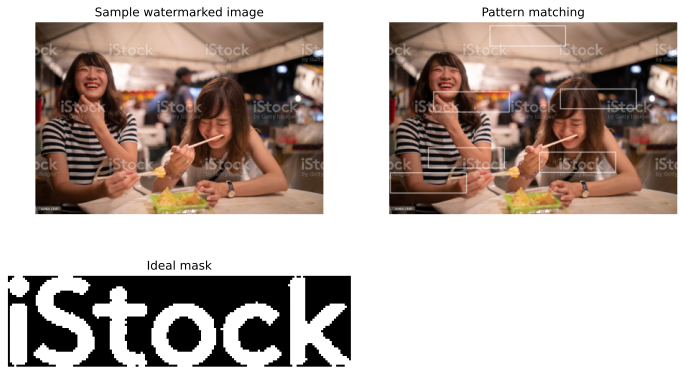

In [8]:
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(marked[0], cv2.COLOR_BGR2RGB))
plt.title("Sample watermarked image")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Pattern matching")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(mask)
plt.title("Ideal mask")
plt.axis("off")
plt.tight_layout()
plt.show()